## Final Project Submission

* Student name: Olu Talabi
* Student pace: full time
* Instructor name: David Elliot
* Blog post URL: https://medium.com/@oluindatascience/10-ai-driven-strategies-to-supercharge-your-digital-marketing-results-in-2023-55bfc46b7ce7


In [1]:
# Your code here - remember to use markdown cells for comments as well

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns





In [2]:
# Create a connection to the database
conn = sqlite3.connect('zippedData/im.db')

Creating our first dataframe using the IMDB dataset

In [3]:
# Write SQL queries to select all records from each table
query_movie_basics = "SELECT * FROM movie_basics"

# Execute the queries and assign the result to a pandas DataFrame
df_movie_basics = pd.read_sql_query(query_movie_basics, conn)

In [4]:
# Display the first few rows of each DataFrame
print(df_movie_basics.head())

    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy  


Loading the gross data from Box Office Mojo dataset

In [5]:
# Load the csv file into a pandas DataFrame
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz', compression='gzip')

# Filter the DataFrame to only include the years 2016, 2017, and 2018
movie_gross = movie_gross[movie_gross['year'].isin([2016, 2017, 2018])]

# Display the first few rows of the filtered DataFrame
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
2322,Captain America: Civil War,BV,408100000.0,745200000,2016
2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000,2016
2324,Finding Dory,BV,486300000.0,542300000,2016
2325,Zootopia,BV,341300000.0,682500000,2016
2326,The Jungle Book (2016),BV,364000000.0,602500000,2016


we need to get the total gross of each movie by summing its domestic and foreign gross

In [6]:
# Convert foreign_gross to float and replace NaN values with zero
movie_gross['foreign_gross'] = pd.to_numeric(movie_gross['foreign_gross'], errors='coerce').fillna(0)

# Calculate the total gross for each movie
movie_gross['total_gross'] = movie_gross['domestic_gross'] + movie_gross['foreign_gross']


merge the top 100 grossing movies with the movie basics

In [7]:
# Sort the dataframe by total_gross in descending order and select the top 100
top_100_grossing_movies = movie_gross.sort_values('total_gross', ascending=False).head(100)

# Merge the two dataframes on the title columns
merged_df = pd.merge(top_100_grossing_movies, df_movie_basics, how='inner', 
                     left_on='title', right_on='primary_title')

# Display the merged dataframe
merged_df.head()


,title,studio,domestic_gross,foreign_gross,year,total_gross,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09,tt1825683,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi"
1,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09,tt2527336,Star Wars: The Last Jedi,Star Wars: Episode VIII - The Last Jedi,2017,152.0,"Action,Adventure,Fantasy"
2,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,1.309500e+09,tt4881806,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,128.0,"Action,Adventure,Sci-Fi"
3,Incredibles 2,BV,608600000.0,634200000.0,2018,1.242800e+09,tt3606756,Incredibles 2,Incredibles 2,2018,118.0,"Action,Adventure,Animation"
4,Captain America: Civil War,BV,408100000.0,745200000.0,2016,1.153300e+09,tt3498820,Captain America: Civil War,Captain America: Civil War,2016,147.0,"Action,Adventure,Sci-Fi"


calculate ROI

/Users/olu/anaconda3/envs/learn-env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/olu/anaconda3/envs/learn-env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/olu/anaconda3/envs/learn-env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/olu/anaconda3/envs/learn-env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, flags=flags)


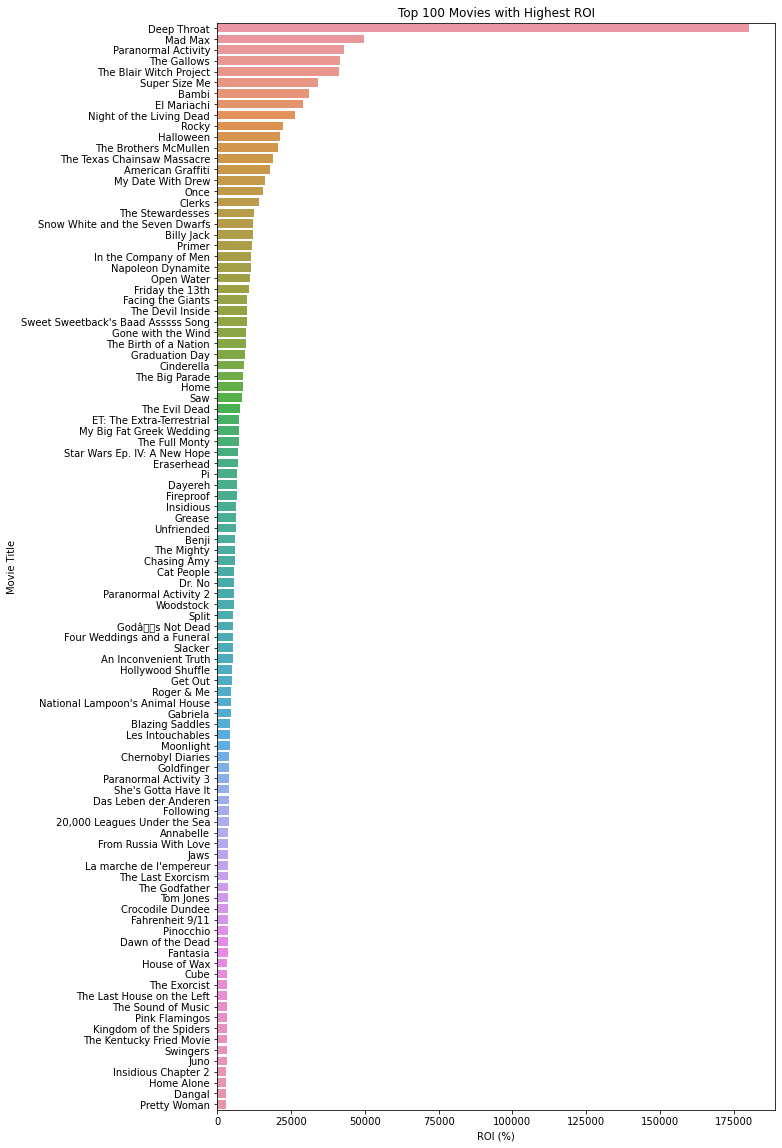

In [8]:
# Function to convert currency formatted string to integer
def currency_to_int(currency):
    return int(currency.replace("$", "").replace(",", ""))

# Load the data
df_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', compression='gzip')

# Convert the currency formatted strings to integers
df_budgets['production_budget'] = df_budgets['production_budget'].apply(currency_to_int)
df_budgets['worldwide_gross'] = df_budgets['worldwide_gross'].apply(currency_to_int)

# Calculate ROI
df_budgets['roi'] = ((df_budgets['worldwide_gross'] - df_budgets['production_budget']) / 
                      df_budgets['production_budget']) * 100

# Get the top 100 movies with highest ROI
top_100_roi_movies = df_budgets.sort_values('roi', ascending=False).head(100)

# Plot the data
plt.figure(figsize=(10, 20))
sns.barplot(data=top_100_roi_movies, y='movie', x='roi')
plt.xlabel('ROI (%)')
plt.ylabel('Movie Title')
plt.title('Top 100 Movies with Highest ROI')
plt.show()


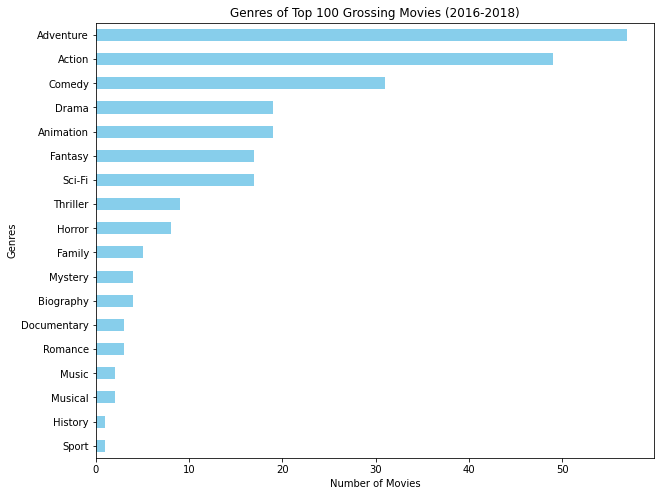

In [9]:
# Create a DataFrame with genre counts
genre_counts = merged_df['genres'].str.get_dummies(',').sum().sort_values()

# Plot a horizontal bar chart
plt.figure(figsize=(10,8))
genre_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Movies')
plt.ylabel('Genres')
plt.title('Genres of Top 100 Grossing Movies (2016-2018)')
plt.show()


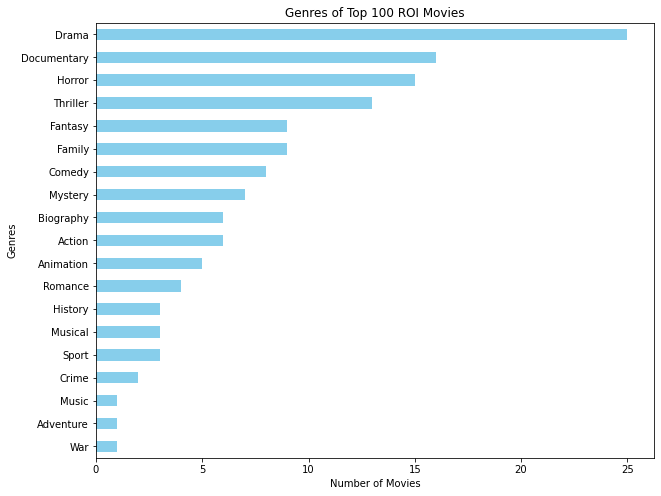

In [10]:
# Merge the top_100_roi_movies dataframe with the df_movie_basics dataframe
top_100_roi_movies['movie'] = top_100_roi_movies['movie'].str.strip()  # Remove leading/trailing whitespaces
df_movie_basics['primary_title'] = df_movie_basics['primary_title'].str.strip()

roi_genres_df = pd.merge(top_100_roi_movies, df_movie_basics, how='inner', 
                         left_on='movie', right_on='primary_title')

# Count the occurrences of each genre
roi_genre_counts = roi_genres_df['genres'].str.get_dummies(',').sum().sort_values()

# Plot a horizontal bar chart
plt.figure(figsize=(10,8))
roi_genre_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Movies')
plt.ylabel('Genres')
plt.title('Genres of Top 100 ROI Movies')
plt.show()


In [11]:
# Make sure the movie titles in both dataframes are stripped of leading/trailing whitespaces
df_budgets['movie'] = df_budgets['movie'].str.strip()

# Merge the budget information into the merged_df dataframe
merged_df = pd.merge(merged_df, df_budgets[['movie', 'production_budget']], how='left', 
                     left_on='title', right_on='movie')

# Now, rename the 'production_budget' column to 'budget'
merged_df.rename(columns={'production_budget': 'budget'}, inplace=True)

# You can drop the extra 'movie' column resulted from merge
merged_df.drop(columns=['movie'], inplace=True)


In [12]:
# Strip whitespaces from movie titles
df_budgets['movie'] = df_budgets['movie'].str.strip()
df_movie_basics['primary_title'] = df_movie_basics['primary_title'].str.strip()

# Merge on movie title
roi_genres_budget_df = pd.merge(df_budgets, df_movie_basics, how='inner', 
                                left_on='movie', right_on='primary_title')

# Check if the merge is successful
print(roi_genres_budget_df.columns)


Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'roi', 'movie_id', 'primary_title', 'original_title',
       'start_year', 'runtime_minutes', 'genres'],
      dtype='object')


calculating the average ROI of each genre

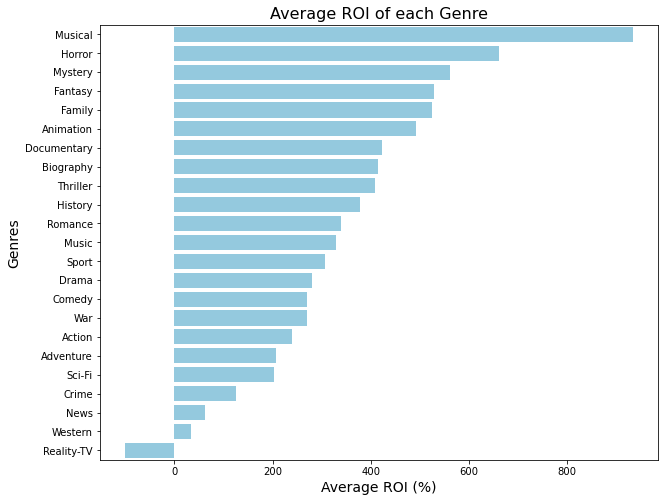

In [13]:
# Split the genres
s = roi_genres_budget_df['genres'].str.split(',').apply(pd.Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'genres'

# Delete the original genres column and join the new one
del roi_genres_budget_df['genres']
roi_genres_budget_df = roi_genres_budget_df.join(s)

# Calculate the average ROI for each genre
average_roi_per_genre = roi_genres_budget_df.groupby('genres')['roi'].mean()

# Create a DataFrame from average_roi_per_genre for better handling
average_roi_df = average_roi_per_genre.reset_index()

# Rename the columns for better understanding
average_roi_df.columns = ['Genre', 'Average ROI']

# Sort the DataFrame in descending order by 'Average ROI'
average_roi_df = average_roi_df.sort_values('Average ROI', ascending=False)

# Plot the data
plt.figure(figsize=(10,8))
sns.barplot(y='Genre', x='Average ROI', data=average_roi_df, ci=None, color='skyblue')

# Add labels and title
plt.xlabel('Average ROI (%)', fontsize=14)
plt.ylabel('Genres', fontsize=14)
plt.title('Average ROI of each Genre', fontsize=16)

# Display the plot
plt.show()


calculating average ROI by release month

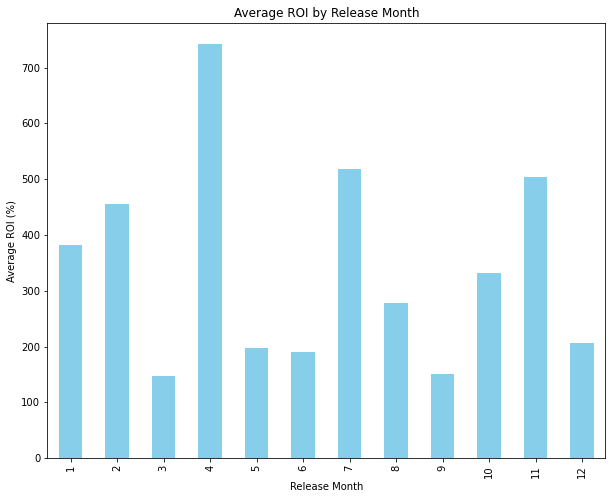

In [14]:
# Convert release date to datetime
roi_genres_budget_df['release_date'] = pd.to_datetime(roi_genres_budget_df['release_date'])

# Extract the release month
roi_genres_budget_df['release_month'] = roi_genres_budget_df['release_date'].dt.month

# Calculate average ROI by release month
average_roi_by_month = roi_genres_budget_df.groupby('release_month')['roi'].mean()

# Plot the data
average_roi_by_month.plot(kind='bar', figsize=(10,8), color='skyblue')
plt.xlabel('Release Month')
plt.ylabel('Average ROI (%)')
plt.title('Average ROI by Release Month')
plt.show()


calculating average ROI by Production Budget

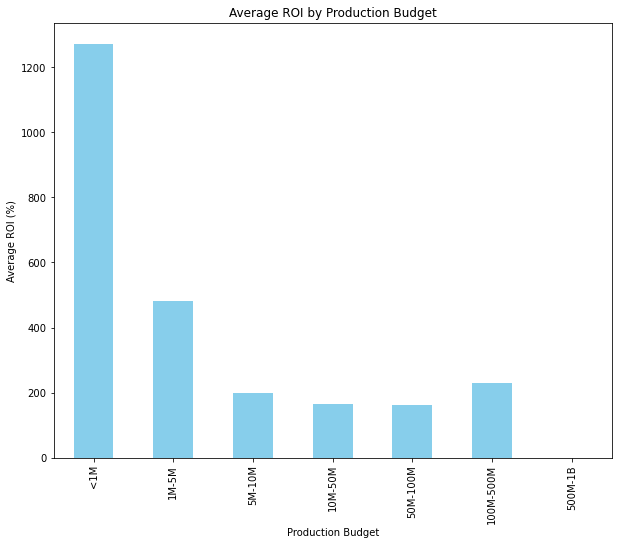

In [15]:
# Create budget categories
bins = [0, 1e6, 5e6, 10e6, 50e6, 1e8, 5e8, 1e9]
labels = ['<1M', '1M-5M', '5M-10M', '10M-50M', '50M-100M', '100M-500M', '500M-1B']
roi_genres_budget_df['budget_category'] = pd.cut(roi_genres_budget_df['production_budget'], bins=bins, labels=labels)

# Calculate average ROI for each budget category
average_roi_by_budget_category = roi_genres_budget_df.groupby('budget_category')['roi'].mean()

# Plot the data
average_roi_by_budget_category.plot(kind='bar', figsize=(10,8), color='skyblue')
plt.xlabel('Production Budget')
plt.ylabel('Average ROI (%)')
plt.title('Average ROI by Production Budget')
plt.show()
